In [0]:
import tensorflow as tf

In [2]:
import  keras
import  numpy as  np
import pandas as pd
from keras.preprocessing import image
from tqdm import  tqdm

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt

In [0]:
from PIL import Image
import numpy as np
import os
import cv2
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [11]:
from google.colab import files
files.upload()#choose your person kaggle.json downloaded from kaggle

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ajcool19","key":"b7eae67f2b769435be7d9713cc27a55f"}'}

In [0]:
!pip install -q kaggle


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [16]:
!kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56          27754  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59          21706  
iarunava/cell-images-for-detecting-malaria                   Malaria Cell Images Dataset                         337MB  2018-12-05 05:40:21           4374  
bigquery/crypto-ethereum-classic                             Ethereum Classic Blockchain                          70GB  2019-03-20 23:21:25              0  
jutrera/stanford-car-dataset-by-classes-folder            

In [14]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 98% 329M/337M [00:04<00:00, 72.7MB/s]
100% 337M/337M [00:04<00:00, 79.0MB/s]


In [15]:
!ls

cell-images-for-detecting-malaria.zip  kaggle.json  sample_data


In [0]:
from zipfile import ZipFile
data= ZipFile('cell-images-for-detecting-malaria.zip')
fields= ['Parasitized','Uninfected'] 

In [0]:

data.extractall()

In [7]:
data.printdir()

File Name                                             Modified             Size
cell_images/                                   2018-03-28 09:09:12            0
cell_images/Parasitized/                       2018-03-28 08:36:34            0
cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png 2016-07-13 12:39:20        14025
cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png 2016-07-13 12:39:20        18152
cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png 2016-07-13 12:39:20        12825
cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png 2016-07-13 12:39:20        13627
cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png 2016-07-13 12:39:20        11236
cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png 2016-07-13 12:39:20        14725
cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_168.png 2016-07-13 12:39:20        11218
cell_images/Parasitized/C100P61ThinF_IM

In [8]:
import os
print(os.listdir('cell_images/Parasitized/'))
print(os.listdir('cell_images/Uninfected/'))

['C120P81ThinF_IMG_20151002_130918_cell_197.png', 'C184P145ThinF_IMG_20151203_104153_cell_138.png', 'C175P136NThinF_IMG_20151127_142326_cell_240.png', 'C129P90ThinF_IMG_20151004_134944_cell_3.png', 'C59P20thinF_IMG_20150803_113139_cell_33.png', 'C47P8thin_Original_Motic_IMG_20150714_093636_cell_188.png', 'C182P143NThinF_IMG_20151201_172216_cell_182.png', 'C60P21thinF_IMG_20150804_113011_cell_7.png', 'C48P9thinF_IMG_20150721_160944_cell_218.png', 'C59P20thinF_IMG_20150803_112858_cell_171.png', 'C108P69ThinF_IMG_20150924_225004_cell_224.png', 'C102P63ThinF_IMG_20150918_163054_cell_169.png', 'C189P150ThinF_IMG_20151203_141004_cell_73.png', 'C72P33_ThinF_IMG_20150815_104045_cell_208.png', 'C132P93ThinF_IMG_20151004_152505_cell_113.png', 'C99P60ThinF_IMG_20150918_141351_cell_96.png', 'C181P142ThinF_IMG_20151127_160434_cell_156.png', 'C186P147NThinF_IMG_20151203_150859_cell_163.png', 'C128P89ThinF_IMG_20151004_131231_cell_140.png', 'C149P110ThinF_IMG_20151115_115154_cell_254.png', 'C46P7Thin

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow



In [13]:
data=[]#assigning labels and images to lists data and labels for further proccesing.
labels=[]
parasitized_path =os.listdir("cell_images/Parasitized/")
for pars in parasitized_path:
    try:
        image=cv2.imread("cell_images/Parasitized/"+ pars)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append(0)
    except Exception as e:
        print(e)

'NoneType' object has no attribute '__array_interface__'


In [14]:
uninfected_path=os.listdir('cell_images/Uninfected/')
for unef in uninfected_path:
    try:
        image=cv2.imread("cell_images/Uninfected/" + unef)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append(1)
    except Exception as e:
        print(e)

'NoneType' object has no attribute '__array_interface__'


In [15]:
print('Lenght of Data : ' + str(len(data)))
print('Lenght of Data : ' + str(len(labels)))

Lenght of Data : 27558
Lenght of Data : 27558


In [16]:

Cells = np.array(data)
labels = np.array(labels)

np.save('Cells' , Cells)
np.save('labels' , labels)
print('Cells : {} | labels : {}'.format(Cells.shape , labels.shape))
    

Cells : (27558, 224, 224, 3) | labels : (27558,)


In [0]:
Cells=np.load("Cells.npy")
labels=np.load("labels.npy")

In [0]:
num_classes=len(np.unique(labels))
len_data=len(Cells)

In [0]:
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255 
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]
y_train=keras.utils.to_categorical(y_train,num_classes) #one hot encoding
y_test=keras.utils.to_categorical(y_test,num_classes)

In [0]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=256,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=512,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model.fit(x_train,y_train,batch_size=128,epochs=20,verbose=1)

Epoch 1/20
9000/9000 [==============================] - 489s 54ms/step - loss: 0.6938 - acc: 0.5404
Epoch 2/20
9000/9000 [==============================] - 516s 57ms/step - loss: 0.4259 - acc: 0.8067
Epoch 3/20
9000/9000 [==============================] - 502s 56ms/step - loss: 0.1767 - acc: 0.9444
Epoch 4/20
9000/9000 [==============================] - 518s 58ms/step - loss: 0.1563 - acc: 0.9516
Epoch 5/20
9000/9000 [==============================] - 484s 54ms/step - loss: 0.1415 - acc: 0.9560
Epoch 6/20
9000/9000 [==============================] - 507s 56ms/step - loss: 0.1347 - acc: 0.9564
Epoch 7/20
9000/9000 [==============================] - 480s 53ms/step - loss: 0.1302 - acc: 0.9587
Epoch 8/20
9000/9000 [==============================] - 478s 53ms/step - loss: 0.1220 - acc: 0.9597
Epoch 9/20
9000/9000 [==============================] - 499s 55ms/step - loss: 0.1117 - acc: 0.9618
Epoch 10/20
9000/9000 [==============================] - 531s 59ms/step - loss: 0.1058 - acc: 0.9630

In [26]:
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

1000/1000 [==============================] - 17s 17ms/step

 Test_Accuracy:- 0.946


In [0]:
from keras.models import load_model
model.save('cells.h4')

In [0]:
def test_model(path):
  image=cv2.imread(path)
  cv2_imshow(image)
  image_from_array = Image.fromarray(image, 'RGB')
  size_image = image_from_array.resize((224, 224))
  imgar=np.array(size_image)/255
  narray=[]
  narray.append(imgar)
  narray=np.array(narray) 

  model=load_model("cells.h4")
  score=model.predict(narray,verbose=1)
  print(score)
  val=np.argmax(score)
  
  if val==0:
    print("Malaria detected")
  else:
    print("Safe")

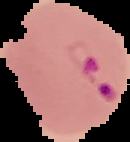

1/1 [==============================] - 1s 697ms/step
[[1.0000000e+00 5.3829616e-08]]
Malaria detected


In [50]:
test_model("cell_images/Parasitized/C101P62ThinF_IMG_20150918_151006_cell_80.png")